In [1]:
import os 
import pandas as pd 
import numpy as np
from boruta import BorutaPy
from preprocessing import run_iterativeBoruta, imputation_scaling
import json
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

# Boruta

In [7]:
datasetTimepoint = "12_sterol_discoveryValidation_corrected"
target = "disease_severity"

''' 
Define paths
'''
dataPath = "../../results/preprocessing/cleaned"
dataset = f"{datasetTimepoint}_{target}_cleaned.csv"
resultsPath = f"../../results/featureSelection/{datasetTimepoint}"
os.makedirs(resultsPath, exist_ok=True)

In [8]:
''' 
Read data
'''
data = pd.read_csv(f"{dataPath}/{dataset}", index_col=0)
X = data.drop(target, axis=1)
y = data[target].ravel()

'''
Prepare preprocessing
'''
num_columns = X.select_dtypes(include=["float64"]).columns
bin_columns = X.select_dtypes(include=["int64"]).columns
cat_columns = X.select_dtypes(include=["object"]).columns
preprocessor = imputation_scaling(num_columns, bin_columns, cat_columns, X)
columnOrderAfterPreprocessing = [ele[5:] for ele in preprocessor.get_feature_names_out()]

''' 
Preprocess
'''
X_preproc = preprocessor.fit_transform(X)

print(X_preproc.shape)

(164, 10)


# Run iterative Boruta

In [4]:
''' Iterative Boruta'''
n_iter = 100
perc = 100
dict_iterBoruta = run_iterativeBoruta(X=X_preproc,
                                      y=y, 
                                      cols=columnOrderAfterPreprocessing, 
                                      perc=perc,
                                      n_iter=n_iter)

''' Save '''
with open(f"{resultsPath}/iterativeBoruta_{perc}perc.json", "w") as f: json.dump(dict_iterBoruta, f, indent=4)

Round 1 of 100
Round 2 of 100
Round 3 of 100
Round 4 of 100
Round 5 of 100
Round 6 of 100
Round 7 of 100
Round 8 of 100
Round 9 of 100
Round 10 of 100
Round 11 of 100
Round 12 of 100
Round 13 of 100
Round 14 of 100
Round 15 of 100
Round 16 of 100
Round 17 of 100
Round 18 of 100
Round 19 of 100
Round 20 of 100
Round 21 of 100
Round 22 of 100
Round 23 of 100
Round 24 of 100
Round 25 of 100
Round 26 of 100
Round 27 of 100
Round 28 of 100
Round 29 of 100
Round 30 of 100
Round 31 of 100
Round 32 of 100
Round 33 of 100
Round 34 of 100
Round 35 of 100
Round 36 of 100
Round 37 of 100
Round 38 of 100
Round 39 of 100
Round 40 of 100
Round 41 of 100
Round 42 of 100
Round 43 of 100
Round 44 of 100
Round 45 of 100
Round 46 of 100
Round 47 of 100
Round 48 of 100
Round 49 of 100
Round 50 of 100
Round 51 of 100
Round 52 of 100
Round 53 of 100
Round 54 of 100
Round 55 of 100
Round 56 of 100
Round 57 of 100
Round 58 of 100
Round 59 of 100
Round 60 of 100
Round 61 of 100
Round 62 of 100
Round 63 of 100
R

In [5]:
''' Load data '''
perc=100
with open(f"{resultsPath}/iterativeBoruta_{perc}perc.json", "r") as f: dict_iterBoruta = json.load(f)
dict_iterBoruta

{'2425-dihydrolanosterol': 0.85,
 'zymostenol': 0.78,
 'desmosterol': 0.95,
 '24-dehydrolathosterol': 0.56}

/tmp/ipykernel_2934819/2047734180.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[0],rotation=90)


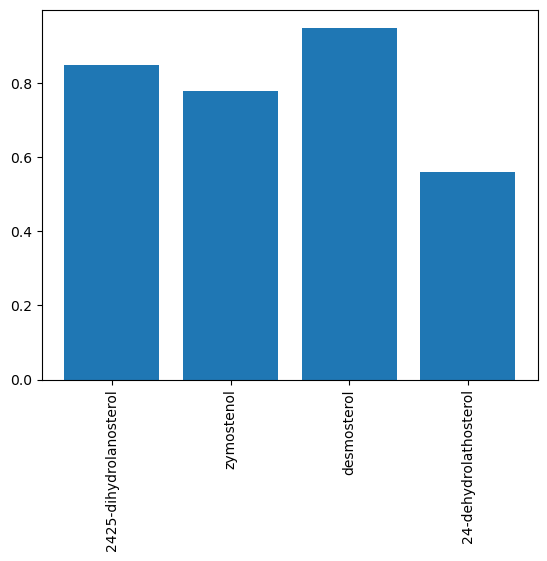

In [8]:
fig, ax = plt.subplots()
df = pd.DataFrame(dict_iterBoruta.items())
ax.bar(x=df[0], height=df[1])
ax.set_xticklabels(df[0],rotation=90)
plt.show()

In [ ]:
''' Save those above threshold (50%)?'''
thresh = 0.5

with open(f"{resultsPath}/iterativeBoruta.txt", "w") as f: 
    for key, val in dict_iterBoruta.items():
        if val > thresh: 
            f.write(key+"\n")